In [1]:
import pandas as pd
import numpy as np
# hugginface datasets
from datasets import load_dataset

In [3]:
import dlomix
dlomix.__version__

ModuleNotFoundError: No module named 'dlomix'

## Load data from Huggingface for further work

In [3]:
dataset = load_dataset("Wilhelmlab/prospect-ptms-charge")

In [4]:
dataset

DatasetDict({
    train: Dataset({
        features: ['modified_sequence', 'raw_file', 'scan_number', 'package', 'most_abundant_charge_state', 'observed_charge_states', 'charge_state_dist'],
        num_rows: 1142537
    })
    val: Dataset({
        features: ['modified_sequence', 'raw_file', 'scan_number', 'package', 'most_abundant_charge_state', 'observed_charge_states', 'charge_state_dist'],
        num_rows: 328072
    })
    test: Dataset({
        features: ['modified_sequence', 'raw_file', 'scan_number', 'package', 'most_abundant_charge_state', 'observed_charge_states', 'charge_state_dist'],
        num_rows: 161588
    })
})

### Convert test set to pandas dataframe (only if manipulation is needed)

In [5]:
df = dataset["test"].to_pandas()

In [6]:
df.head()

,modified_sequence,raw_file,scan_number,package,most_abundant_charge_state,observed_charge_states,charge_state_dist
0,[UNIMOD:737]-YIHNILSI-[],"[02527_BA6-TMT_TUM_HLA_6_01_01-TMT1-1h-R1, 025...","[53707, 59458, 59518]",[TMT_TUM_HLA],"[0, 1, 0, 0, 0, 0]","[0, 1, 0, 0, 0, 0]","[0.0, 1.0, 0.0, 0.0, 0.0, 0.0]"
1,[]-FHTPSNSYTAQR-[],[02208a_GC3-TUM_second_addon_27_01_01-2xIT_2xH...,"[13616, 13659, 13660, 13759, 13760, 13761, 138...",[TUM_second_addon],"[0, 0, 1, 0, 0, 0]","[0, 1, 1, 0, 0, 0]","[0.0, 0.18388216654438674, 0.8161178334556133,..."
2,[]-IPGPEGQEVLC[UNIMOD:4]KQIK-[],[01748a_BH4-TUM_second_pool_66_01_01-2xIT_2xHC...,"[21369, 21370, 21371, 21397, 21398, 21399, 214...",[TUM_second_pool],"[0, 0, 1, 0, 0, 0]","[0, 1, 1, 0, 0, 0]","[0.0, 0.03440733446425485, 0.9655926655357452,..."
3,[]-TGQK[UNIMOD:1]VALKK-[],[02195a_GA4-TUM_mod_acetylated_4_01_01-DDA-1h-...,"[9811, 9913, 9914, 10066, 10067]",[TUM_mod_acetylated],"[0, 1, 0, 0, 0, 0]","[0, 1, 0, 0, 0, 0]","[0.0, 1.0, 0.0, 0.0, 0.0, 0.0]"
4,[]-ATLC[UNIMOD:4]C[UNIMOD:4]ARPEPR-[],[01717a_BF3-TUM_second_pool_34_01_01-2xIT_2xHC...,"[8995, 8996, 8997, 9041, 9042, 9043, 9300, 935...",[TUM_second_pool],"[0, 0, 1, 0, 0, 0]","[0, 1, 1, 0, 0, 0]","[0.0, 0.007387597915967662, 0.9926124020840323..."


## Create dataset

In [7]:
from dlomix.data.charge_state import ChargeStateDataset
from dlomix.constants import PTMS_ALPHABET

ModuleNotFoundError: No module named 'dlomix'

In [10]:
data = ChargeStateDataset(
    data_source="Wilhelmlab/prospect-ptms-charge", 
    data_format="hub", 
    sequence_column="modified_sequence", 
    label_column="charge_state_dist", 
    pad=True, 
    padding_value=0, 
    alphabet=PTMS_ALPHABET, 
    encoding_scheme="naive-mods"
    )

/root/miniforge3/envs/pcp_env/lib/python3.11/site-packages/dlomix/data/dataset.py:280: UserWarning: The provided data is assumed to be hosted on the Hugging Face Hub since data_format is set to "hub". Validation and test data sources will be ignored.
  warnings.warn(


Mapping SequenceParsingProcessor:   0%|          | 0/914029 [00:00<?, ? examples/s]

Mapping SequenceParsingProcessor:   0%|          | 0/228508 [00:00<?, ? examples/s]

Mapping SequenceEncodingProcessor:   0%|          | 0/914029 [00:00<?, ? examples/s]

Mapping SequenceEncodingProcessor:   0%|          | 0/228508 [00:00<?, ? examples/s]

Mapping SequencePaddingProcessor:   0%|          | 0/914029 [00:00<?, ? examples/s]

Mapping SequencePaddingProcessor:   0%|          | 0/228508 [00:00<?, ? examples/s]

Mapping SequencePaddingProcessor:   0%|          | 0/161588 [00:00<?, ? examples/s]

Filter:   0%|          | 0/914029 [00:00<?, ? examples/s]

Filter:   0%|          | 0/228508 [00:00<?, ? examples/s]

## Create model

In [11]:
from tensorflow.keras.optimizers import Adam

2024-08-13 17:49:31.894083: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-08-13 17:49:31.971368: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-08-13 17:49:31.971390: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-08-13 17:49:31.989429: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-08-13 17:49:32.016176: I tensorflow/core/platform/cpu_feature_guar

In [12]:
optimizer = Adam(learning_rate=0.0001)

2024-08-13 17:49:33.496867: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:887] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-08-13 17:49:33.604179: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:887] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-08-13 17:49:33.604211: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:887] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-08-13 17:49:33.609482: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:887] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-08-13 17:49:33.609517: I external/local_xla/xla/stream_executor

## Import model

In [17]:
from dlomix.models.chargestate import ChargeStateDistributionPredictor

ModuleNotFoundError: No module named 'dlomix.models.chargestate'

In [11]:
charge_distribution_model = ChargeStateDistributionPredictor(seq_length=30, vocab_dict=PTMS_ALPHABET)
charge_distribution_model.compile(optimizer=optimizer, loss='mean_absolute_error')

NameError: name 'ChargeStateDistributionPredictor' is not defined

## Train model

In [13]:
charge_distribution_model_history = charge_distribution_model.fit(
    data.tensor_train_data, 
    validation_data=data.tensor_val_data,
    epochs=5,
)

Epoch 1/5
4446/4446 [==============================] - 179s 40ms/step - loss: 0.0521 - val_loss: 0.0340
Epoch 2/5
4446/4446 [==============================] - 179s 40ms/step - loss: 0.0349 - val_loss: 0.0288
Epoch 3/5
4446/4446 [==============================] - 179s 40ms/step - loss: 0.0314 - val_loss: 0.0265
Epoch 4/5
4446/4446 [==============================] - 178s 40ms/step - loss: 0.0297 - val_loss: 0.0253
Epoch 5/5
4446/4446 [==============================] - 178s 40ms/step - loss: 0.0288 - val_loss: 0.0250


### Train History

In [13]:
import matplotlib.pyplot as plt

In [14]:
def plot_learning_curves(history, title='Learning Curves'):
    history_dict = history.history
    loss = history_dict['loss']
    val_loss = history_dict.get('val_loss', [])
    
    epochs = range(1, len(loss) + 1)
    
    plt.figure(figsize=(8, 5))
    plt.plot(epochs, loss, 'b-', label='Training Loss')
    if val_loss:
        plt.plot(epochs, val_loss, 'r-', label='Validation Loss')
    plt.title(title)
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

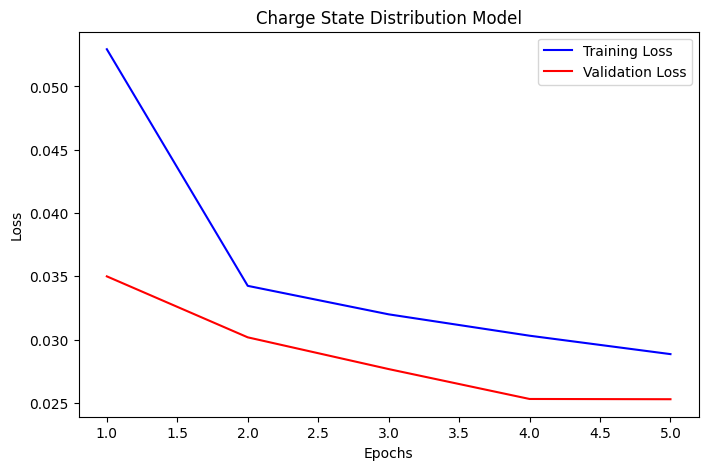

In [15]:
plot_learning_curves(charge_distribution_model_history, title='Charge State Distribution Model')